In [1]:
import pandas as pd  # It is used for data manipulation and analysis.
import numpy as np  # Used for multi-dimensional array and matrices.

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 

import seaborn as sns  # Used for high-level interfaces and to to draw informative statistical graphics.
import matplotlib.pyplot as plt  # It provides an object-oriented API for embedding plots into applications
%matplotlib inline  
# It is used to set the backend of matplotlib to the 'inline' backend:
import time  # For calculating time 

# Set of Basic modules used for the 'Data Preprocessing'.

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline 

In [2]:
# Read the data from CSV file
# https://archive.ics.uci.edu/ml/datasets/phishing+websites
learn_data = pd.read_csv('phishing_urls_db.csv')

In [3]:
# View the first 5 rows of the data
learn_data.head()

# View the last 5 rows of the data
learn_data.tail()

# Get information about the data
#learn_data.info()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [4]:
# It is important to check if there are any missing values in dataset.

learn_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
# Let's start the pre processing of our data.

In [6]:
# Tokenize the URL column
# Reference taken from https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/tree/master/DataFiles
tokenization = RegexpTokenizer(r'[A-Za-z]+')
learn_data.URL[1]
tokenization.tokenize(learn_data.URL[1]) 
t0= time.perf_counter()
learn_data['The_text_being_tokenized'] = learn_data.URL.map(lambda t: tokenization.tokenize(t)) # This will do it with all rows.
t1 = time.perf_counter() - t0
print('Time taken: ',t1 ,'seconds')

Time taken:  3.6123252001125365 seconds


In [7]:
# View a sample of the data after tokenization
learn_data.sample(10)

,URL,Label,The_text_being_tokenized
387316,merchantcircle.com/business/Mountaineer.Power....,good,"[merchantcircle, com, business, Mountaineer, P..."
149076,biblioteca.universia.net/html_bura/ficha/param...,good,"[biblioteca, universia, net, html, bura, ficha..."
426337,rutalee.com/biography.html,good,"[rutalee, com, biography, html]"
393890,mtv.com/news/articles/1654446/diddydirty-money...,good,"[mtv, com, news, articles, diddydirty, money, ..."
429601,setlist.fm/setlists/vermillion-lies-2bd7a03a.html,good,"[setlist, fm, setlists, vermillion, lies, bd, ..."
288946,baseballprospectus.com/chat/chat.php?chatId=437,good,"[baseballprospectus, com, chat, chat, php, cha..."
376624,linkedin.com/pub/dir/jeff/cornell,good,"[linkedin, com, pub, dir, jeff, cornell]"
468888,yellowpages.com/jacksonville-beach-fl/mip/rhod...,good,"[yellowpages, com, jacksonville, beach, fl, mi..."
154055,buzzntrends.com/meaghan+rath,good,"[buzzntrends, com, meaghan, rath]"
220209,nbcuni-internationalcareers.com/faqs/,good,"[nbcuni, internationalcareers, com, faqs]"


In [8]:
# Stem the tokenized text using SnowballStemmer 
# Reference taken from https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction
stemmed = SnowballStemmer("english") 
print('Stemming started ...')
t0= time.perf_counter()
learn_data['The_text_Stemmed'] = learn_data['The_text_being_tokenized'].map(lambda l: [stemmed.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken: ',t1 ,'seconds')

Stemming started ...
Time taken:  60.69314959994517 seconds


In [9]:
# View a sample of the data after stemming
learn_data.sample(10)

,URL,Label,The_text_being_tokenized,The_text_Stemmed
308548,conceptcarz.com/vehicle/z1414/Chevrolet-Cavali...,good,"[conceptcarz, com, vehicle, z, Chevrolet, Cava...","[conceptcarz, com, vehicl, z, chevrolet, caval..."
156484,carpricescanada.com/prov_dealers.php?PROV=Quebec,good,"[carpricescanada, com, prov, dealers, php, PRO...","[carpricescanada, com, prov, dealer, php, prov..."
224148,openlibrary.org/authors/OL465130A/John_Dickson...,good,"[openlibrary, org, authors, OL, A, John, Dicks...","[openlibrari, org, author, ol, a, john, dickso..."
324781,examiner.com/entertainment-reviews-in-national...,good,"[examiner, com, entertainment, reviews, in, na...","[examin, com, entertain, review, in, nation, j..."
477555,youtube.com/watch?v=pUwQ8YFZYp0,good,"[youtube, com, watch, v, pUwQ, YFZYp]","[youtub, com, watch, v, puwq, yfzyp]"
238283,server.theadvocates.org/celebrities/mancow-mul...,good,"[server, theadvocates, org, celebrities, manco...","[server, theadvoc, org, celebr, mancow, muller..."
197450,home.cc.umanitoba.ca/~wyatt/rp/filmography.html,good,"[home, cc, umanitoba, ca, wyatt, rp, filmograp...","[home, cc, umanitoba, ca, wyatt, rp, filmograp..."
354778,hotfrog.com.au/Companies/Vern-Barnet-School-Fo...,good,"[hotfrog, com, au, Companies, Vern, Barnet, Sc...","[hotfrog, com, au, compani, vern, barnet, scho..."
291302,bikudo.com/archives/2006/aug/112.html,good,"[bikudo, com, archives, aug, html]","[bikudo, com, archiv, aug, html]"
189483,forum.urduworld.com/f999/javed-akhtar-206277/,good,"[forum, urduworld, com, f, javed, akhtar]","[forum, urduworld, com, f, jave, akhtar]"


In [10]:
# Join the stemmed words to form sentences
print('Joining all the words')
t0= time.perf_counter()
learn_data['Text_sent'] = learn_data['The_text_Stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken: ',t1 ,'seconds')

Joining all the words
Time taken:  0.41021359991282225 seconds


In [11]:
# View a sample of the data after joining the stemmed words
learn_data.sample(10)

,URL,Label,The_text_being_tokenized,The_text_Stemmed,Text_sent
281349,answers.com/topic/william-grey-walter,good,"[answers, com, topic, william, grey, walter]","[answer, com, topic, william, grey, walter]",answer com topic william grey walter
365747,jimgleeson.com/,good,"[jimgleeson, com]","[jimgleeson, com]",jimgleeson com
336836,fifaworldcupsoccernews.com/newzealand/,good,"[fifaworldcupsoccernews, com, newzealand]","[fifaworldcupsoccernew, com, newzealand]",fifaworldcupsoccernew com newzealand
199721,ieee.orbita.ru/aps/Rep07_APS.htm,good,"[ieee, orbita, ru, aps, Rep, APS, htm]","[ieee, orbita, ru, ap, rep, ap, htm]",ieee orbita ru ap rep ap htm
13751,muarb3901.batcave.net/post.php,bad,"[muarb, batcave, net, post, php]","[muarb, batcav, net, post, php]",muarb batcav net post php
327570,facebook.com/jeanmarc.vallee,good,"[facebook, com, jeanmarc, vallee]","[facebook, com, jeanmarc, valle]",facebook com jeanmarc valle
118906,uniformesescolares.com.ec/cli/yes-png/ScreenDr...,bad,"[uniformesescolares, com, ec, cli, yes, png, S...","[uniformesescolar, com, ec, cli, yes, png, scr...",uniformesescolar com ec cli yes png screendrop...
141824,am.blogs.cnn.com/2011/04/18/robert-macneil-tal...,good,"[am, blogs, cnn, com, robert, macneil, talks, ...","[am, blog, cnn, com, robert, macneil, talk, ab...",am blog cnn com robert macneil talk about auti...
439095,sterlingcollege.edu/rhi.html,good,"[sterlingcollege, edu, rhi, html]","[sterlingcolleg, edu, rhi, html]",sterlingcolleg edu rhi html
426714,salarylist.com/company/Port-Of-Oakland-Salary.htm,good,"[salarylist, com, company, Port, Of, Oakland, ...","[salarylist, com, compani, port, of, oakland, ...",salarylist com compani port of oakland salari htm


In [12]:
# Establishing Model

In [13]:
# Creating the CV object
cv = CountVectorizer()

In [14]:
# It will Transform all text which we had tokenized and stemmed earlier
# https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/blob/master/URL%20Feature%20Extraction.ipynb
features = cv.fit_transform(learn_data.Text_sent) 

In [15]:
# Converting Sparse Matrix into array [it will print ouot the transformed features]

features[:5].toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
# Splitting the data 
trainX, testX, trainY, testY = train_test_split(features, learn_data.Label)

In [17]:
# Logistic Regression

In [18]:
# Create an instance of logistic regression model.
lr = LogisticRegression()

In [19]:
# Fit the logistic regression model on the training set.
lr.fit(trainX, trainY)

c:\Users\chath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Get the logistic regression model's accuracy score
lr.score(testX,testY)

0.9633165133940599

In [21]:
# Add the accuracy score to a dictionary
Scores_lr = {}
Scores_lr['Logistic Regression'] = np.round(lr.score(testX, testY), 2)

Training Accuracy Achieved : 0.9777189333242721
Testing Accuracy Achieved : 0.9633165133940599

Printing the CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36551
        Good       0.99      0.96      0.97    100786

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


Printing the CONFUSION MATRIX


<AxesSubplot:>

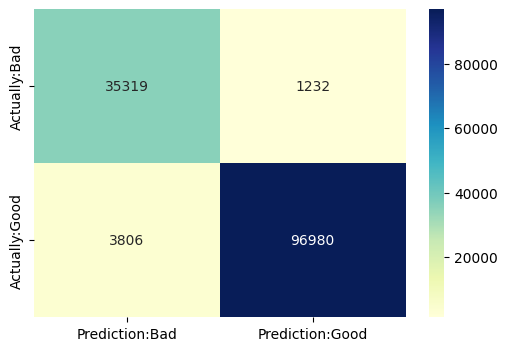

In [22]:
# Print the training and testing accuracy and the classification report
print('Training Accuracy Achieved :',lr.score(trainX,trainY))
print('Testing Accuracy Achieved :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Prediction:Bad', 'Prediction:Good'],
            index = ['Actually:Bad', 'Actually:Good'])
print('\nPrinting the CLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nPrinting the CONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [23]:
# Rain Forest Algorithm

In [24]:
# Random Forest ~ rf
# rf = RandomForestClassifier()

In [25]:
# rf.fit(trainX, trainY)


In [26]:
# rf.score(testX, testY)

In [27]:
# Making sklearn pipeline using Logistic Regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [28]:
# Split the data into training and testing sets and fit the model
trainX, testX, trainY, testY = train_test_split(learn_data.URL, learn_data.Label)
pipeline_ls.fit(trainX,trainY)

c:\Users\chath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\chath\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [29]:
# Get the accuracy score of the model
pipeline_ls.score(testX,testY) 

0.9662144942732112

Training Accuracy Achieved : 0.9805635313791689
Testing Accuracy Achieved: 0.9662144942732112

Printing the CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36767
        Good       0.99      0.97      0.98    100570

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


Printing the CONFUSION MATRIX


<AxesSubplot:>

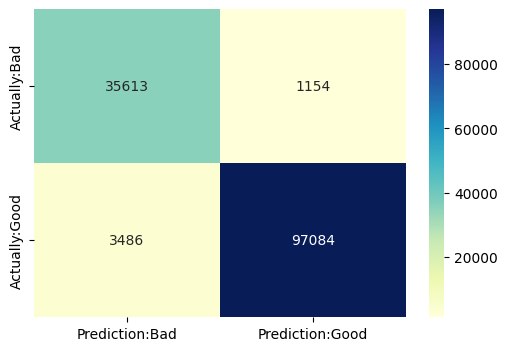

In [30]:
# Printing the training and testing accuracy scores
print('Training Accuracy Achieved :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy Achieved:',pipeline_ls.score(testX,testY))

# Creating a confusion matrix and printing a classification report
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Prediction:Bad', 'Prediction:Good'],
            index = ['Actually:Bad', 'Actually:Good'])
print('\nPrinting the CLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nPrinting the CONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

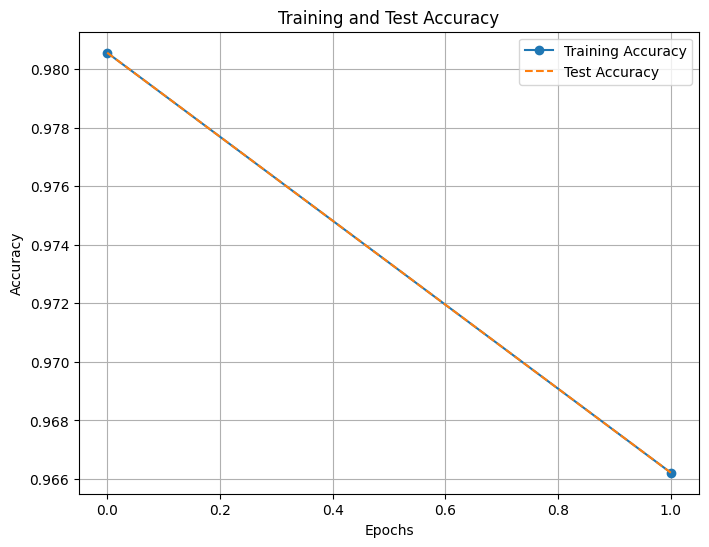

In [31]:
train_accuracy = pipeline_ls.score(trainX,trainY)
test_accuracy = pipeline_ls.score(testX,testY) 
#plt.figure(figsize=(8, 6))
#plt.plot([0, 1], [train_accuracy, train_accuracy], linestyle='--', color='blue', label='Training Accuracy')
#plt.plot([0, 1], [test_accuracy, test_accuracy], linestyle='-', color='red', label='Test Accuracy')
#plt.title('Training and Test Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()



plt.figure(figsize=(8, 6))
plt.plot([0,1], [train_accuracy, test_accuracy], marker='o')
plt.plot([0,1], [train_accuracy, test_accuracy], linestyle='--')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.grid(True)
plt.show()

In [32]:
# Importing Pickle library to dump our entire model. This will be later used with our front end application. 
import pickle

In [33]:
# Saving the model using pickle
pickle.dump(pipeline_ls,open('new_phishing.pkl','wb'))

In [34]:

# Loading the saved model and printing its score on the test data
load_model = pickle.load(open('new_phishing.pkl', 'rb'))
resultant_score = load_model.score(testX,testY)
print(resultant_score)

0.9662144942732112
